In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
from IPython.display import display
import os 

df_tracker_distribution_android = pd.read_csv("./data/Tracker_distribution_android.csv")
df_tracker_distribution_ios = pd.read_csv("./data/Tracker_distribution_ios.csv")

In [3]:
rc_dict = {
        'figure.figsize': (3.5, 2.1), # For 3 plots in a row
        'font.size': 8,
        'grid.linewidth': 0.8,
        'grid.alpha': 0.7,
        'font.size': 8,
        'font.family': 'serif',
        'font.serif': 'Times',
    }


font = {'family' : 'serif', 'weight': 'normal', 'size': 8}

#color_palaette = ["#4c72b0", "#55a868", "#c44e52", "#8172b2", "#ccb974", "#64b5cd"]

# color_palaette = ["#293462", "#F7D716", "#2B8A3E", "#5F3DC4", "#EC9B3B", "#F24C4C", "#0B7285"]

color_palette = ["#0887FE"] # AirGuard blue 
color_palette = ["#00B4FC"] # AirGuard light blue
color_palette = ["#057EFD"] # AirGuard dark blue


def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [4]:
def barplot(df_plot:pd.DataFrame, ax:plt.Axes, title: str, x="Percentage", y="Tracker", bar_label_key="Count"):
    ax = sns.barplot(y=y, x=x, data=df_plot, orient="h", ax=ax)

    # # Set the title and labels
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    if x == "Percentage":
        ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter())
    ax.set_ylabel(None)
    ax.set_title(title, pad=4)
    count_list = df_plot[x].values.tolist()
    max_x = df_plot[x].max()
    # print(f"Containers {ax.containers[0]}")
    # print(f"Bar labels: {labels}")
    # Format as percentage with only two decimals

    # labels = [f"{label:.2f}%" for label in count_list]
    if bar_label_key == "Count":
        labels =  [f"{x:,.0f}" for x in  df_plot[bar_label_key].tolist()]
    elif bar_label_key == "Percentage":
        labels = [f"{x:.2f}%" for x in df_plot[bar_label_key].tolist()]

    ax.bar_label(ax.containers[0], labels, fontsize=7, padding=1.2)
    # Set a higher y limit
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0], (max_x + 2 + max_x * 0.15))

In [5]:
def barplot_hue(df_plot:pd.DataFrame, ax:plt.Axes, title: str=None, x="Percentage", y="Tracker", hue="os", bar_label_key="Count"):
    color_palette = ["#057EFD", "#295D94"] # AirGuard dark blue
    ax = sns.barplot(y=y, x=x, data=df_plot, orient="h", ax=ax, hue=hue, palette=color_palette, legend=False, hue_order=["Android", "iOS"])

    # # Set the title and labels
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    if x == "Percentage":
        ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter())
    ax.set_ylabel(None)
    ax.set_title(title, pad=4)
    max_x = df_plot[x].max()
    # print(f"Containers {ax.containers[0]}")
    # print(f"Bar labels: {labels}")
    # Format as percentage with only two decimals
    labels = [f"{x:,.0f}" for x in df_plot[bar_label_key].tolist()]
    # labels = [f"{label:.2f}%" for label in count_list]
    hue_levels = df_plot["os"].unique().tolist()
    # Iterate over each container (one for each hue level)
    for i, container in enumerate(ax.containers):
        # Filter the DataFrame for the current hue level
        df_plot_hue = df_plot[df_plot["os"] == hue_levels[i]]
        # Create the labels for the current hue level
        if bar_label_key == "Count":
            labels = [f"{x:,.0f}" for x in df_plot_hue[bar_label_key].tolist()]
        elif bar_label_key == "Percentage":
            labels = [f"{x:.2f}%" for x in df_plot_hue[bar_label_key].tolist()]
        print(f"Labels: {labels} for {hue_levels[i]}")
        # Apply the labels to the bars
        print(f"Container length: {len(container)}, labels length: {len(labels)}")
        ax.bar_label(container, labels=labels, fontsize=7, padding=1.2)

        
    # Set a higher y limit
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0], max_x + 2 + max_x * 0.15)
    
    # Add legend
    mpatches = mpl.patches
    bar_1 = mpatches.Patch(color=color_palette[0], label='Android')
    bar_2 = mpatches.Patch(color=color_palette[1], label='iOS')
    # plt.legend(handles=[top_bar, bottom_bar], loc="lower left")
    #Move legend outside of plot
    plt.legend(bbox_to_anchor=(0.8, -0.15), ncol=2, handles=[bar_1, bar_2], frameon=False)

['AirPods', 'AirTag', 'Chipolo', 'Find My', 'SmartTag', 'Tile']
Labels: ['49.34%', '20.78%', '18.50%', '2.00%', '0.17%'] for Android
Container length: 5, labels length: 5
Labels: ['56.24%', '40.72%', '3.04%'] for iOS
Container length: 3, labels length: 3
Saving figure to ./plots/tracker_distribution_background_hue.pdf


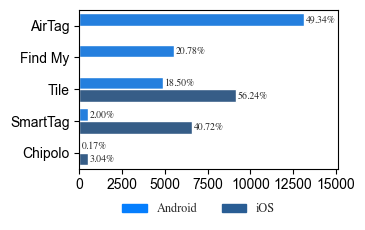

In [6]:
df_plot_android = df_tracker_distribution_android
df_plot_android["Percentage"] = (df_plot_android["Count"] / df_plot_android["Count"].sum()) * 100
df_plot_android["os"] = "Android"

df_plot_ios = df_tracker_distribution_ios

# Remove AirTag and Find My from the iOS data 
df_plot_ios = df_plot_ios[df_plot_ios["Tracker"] != "AirTag"]
df_plot_ios = df_plot_ios[df_plot_ios["Tracker"] != "Find My"]
# Calculate percentages 
df_plot_ios["Percentage"] = (df_plot_ios["Count"] / df_plot_ios["Count"].sum()) * 100
df_plot_ios["os"] = "iOS"

# Combine 
df_plot = pd.concat([df_plot_android, df_plot_ios], ignore_index=True)

#print tracker names 
print(df_plot["Tracker"].unique().tolist())
# Remove AirPods
df_plot = df_plot[df_plot["Tracker"] != "AirPods"]

# Sort by count 
df_plot = df_plot.sort_values(by=["Percentage","Tracker"], ascending=False)
# Sort by fixed tracker oder AirTag, Find My, Tile, SmartTag, Chipolo 
tracker_order = ["AirTag", "Find My", "Tile", "SmartTag", "Chipolo"]
df_plot["Tracker"] = pd.Categorical(df_plot["Tracker"], tracker_order)
df_plot = df_plot.sort_values(by=["Tracker"], ascending=True)

latex_width = 241
fig_size = set_size(latex_width)
no_of_answers = 6
width = fig_size[0]
height_0 = min(fig_size[1], 0.25 + 0.5 * 6)
fig, axs = plt.subplots(1, 1, figsize=(fig_size[0], height_0))

rc_dict["figure.figsize"] = fig_size
# Set the style for the plot
sns.set(style="whitegrid", font="Times", font_scale=0.8, rc=rc_dict)
sns.set_palette(color_palette)

barplot_hue(df_plot, axs, hue="os", x="Count", bar_label_key="Percentage")

name = "tracker_distribution_background_hue.pdf"
out_dir = "./plots"
path = os.path.join(out_dir, name)
print(f"Saving figure to {path}")
plt.savefig(path,bbox_inches='tight', pad_inches=0.01)
plt.show()
plt.close()

In [7]:
def get_fig_size(width, no_of_answers:int=0, fraction=1):
    normalized_size = set_size(width, fraction)

    # Now we want to make sure its not too high for the number of answers
    max_height = normalized_size[1]
    height = 0.25 + 0.2 * no_of_answers

    figsize = (normalized_size[0], height)
    return figsize

Saving figure to ./plots/feedback.pdf


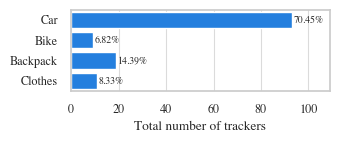

In [8]:
df_feedback = pd.read_csv("./data/Feedback.csv")
df_feedback["Percentage"] = (df_feedback["count"] / df_feedback["count"].sum()) * 100
df_feedback["Count"] = df_feedback["count"]

latex_width = 241 
fig_size = get_fig_size(latex_width, no_of_answers=4)

rc_dict["figure.figsize"] = fig_size
# Set the style for the plot
sns.set(style="whitegrid", font="Times", font_scale=0.8, rc=rc_dict)
sns.set_palette(color_palette)

fig, ax = plt.subplots(1, 1, figsize=fig_size)
plt.subplots_adjust(hspace=0.12)

barplot(df_feedback, ax, None,x="Count", y="location", bar_label_key="Percentage")
ax.set_xlabel("Total number of trackers")

# max_percentage = df_feedback["Percentage"].max()
# xlim = ax.get_xlim()
# ax.set_xlim(xlim[0], min((max_percentage + 100), 100))

name = "feedback.pdf"
out_dir = "./plots"
path = os.path.join(out_dir, name)
print(f"Saving figure to {path}")
plt.savefig(path,bbox_inches='tight', pad_inches=0.01)
plt.show()
plt.close()